In [1]:
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import os 


In [2]:
df=pd.read_csv(r'C:\Users\Preeti kumari\skyserver1.csv')

In [3]:
df.head(10)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


In [4]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [5]:
df["class"].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df["class"] = labelencoder.fit_transform(df["class"])
#only encoding region as other object type almost have same values throught the column and will not be useful

In [7]:
df["class"].value_counts()

0    4998
2    4152
1     850
Name: class, dtype: int64

from above  0=galaxy,star=2,QSO=1


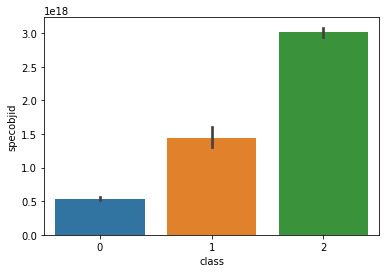

In [8]:
sns.barplot(x="class",y="specobjid",data=df)

Observation:
    
 plate is maximum for 2 which star and minimum for 0 which is galaxy
 

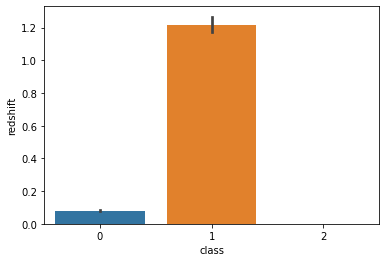

In [9]:
sns.barplot(x="class",y="redshift",data=df)

Observation:
    
 plate is maximum for 1 which is qso and nill for 2 which is star

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  int32  
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int32(1), int64(7)
memory usage: 1.3 MB


In [11]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

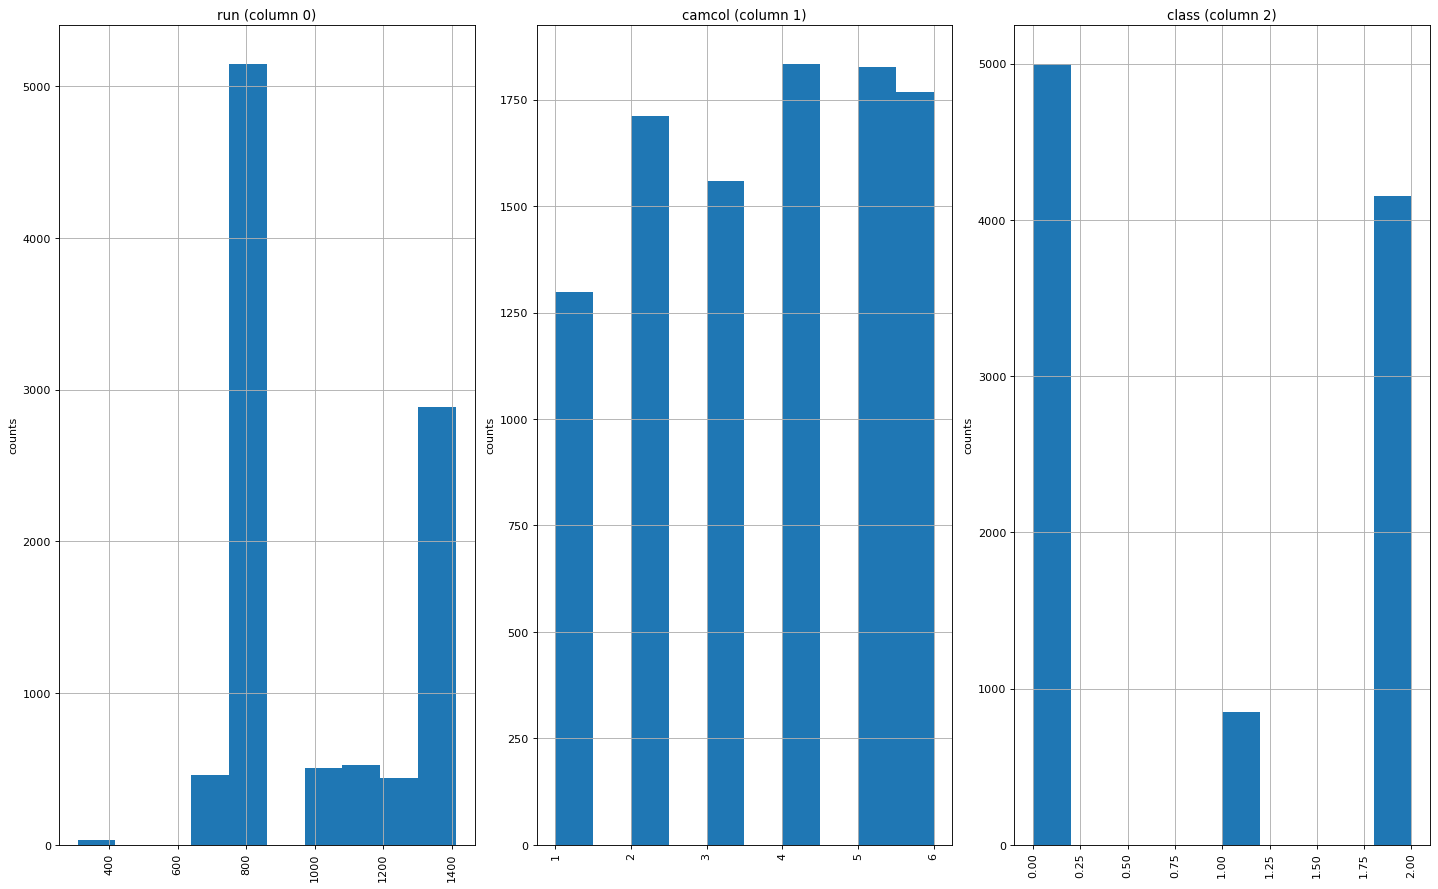

In [12]:
plotPerColumnDistribution(df, 10, 5)


In [13]:
corr_matrix=df.corr()
corr_matrix["class"].sort_values(ascending=False)
#as per this we are dropping Outlet_Location_Type and Outlet_Size.

class        1.000000e+00
mjd          6.487679e-01
plate        5.854948e-01
specobjid    5.854925e-01
z            2.157584e-01
i            1.467908e-01
fiberid      5.359261e-02
r            4.962769e-02
field        7.712555e-03
objid       -3.355500e-15
camcol      -6.185920e-03
ra          -4.321896e-02
dec         -5.891815e-02
redshift    -7.550956e-02
run         -7.816172e-02
g           -9.921163e-02
u           -2.690437e-01
rerun                 NaN
Name: class, dtype: float64

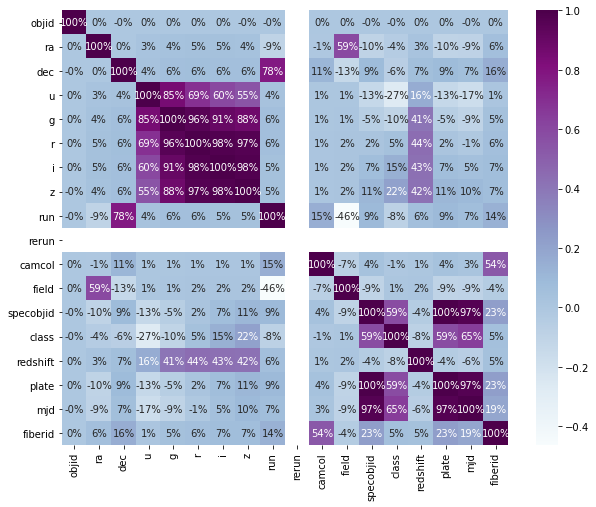

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".0%",cmap='BuPu')
plt.show()

we can see that attributes like (mjd,plate,specobjid,z,i,g,u)has a high correlation with target variable "class"
and we are dropping the rest attributtes 

In [15]:
df.drop(columns=["rerun","camcol","field","fiberid","redshift","ra","dec","r",],axis=1,inplace=True)

In [16]:
df.skew()

objid        1.000150
u           -1.219795
g           -0.536293
i            0.286442
z            0.214313
run          0.412555
specobjid    1.794627
class        0.169292
plate        1.794609
mjd          1.039610
dtype: float64

In [17]:
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [27]:
df.skew()

objid        0.000000
u           -1.219795
g           -0.536293
i            0.286442
z            0.214313
run          0.412555
specobjid    0.696181
class        0.169292
plate        0.696680
mjd          1.011097
dtype: float64

In [19]:
x_d=df.drop(["class"],axis=1)
y=df["class"]

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_d)
x=sc.transform(x_d)
x=pd.DataFrame(x,columns=x_d.columns)

In [21]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
from sklearn import svm  
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 45,test_size=0.20)

In [23]:
model=[DecisionTreeClassifier(),svm.SVC(),RandomForestClassifier(),KNeighborsClassifier()]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Score of",m,"is",accuracy_score(y_test,predm))
    print("Cross val score:",cross_val_score(m,x,y,cv=5,scoring="accuracy").mean())
    print("\n")

Score of DecisionTreeClassifier() is 0.902
Cross val score: 0.8902000000000001


Score of SVC() is 0.9315
Cross val score: 0.9207000000000001


Score of RandomForestClassifier() is 0.936
Cross val score: 0.9231


Score of KNeighborsClassifier() is 0.9245
Cross val score: 0.9173




As SVC classifier has the maximum accuracy ,thereby considering it for hyperparameter tuning

In [24]:
model=svm.SVC()
model.fit(x_train,y_train)
ypred=model.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,ypred))
print("F1 score is:",f1_score(y_test,ypred,average='macro'))
print('Precision score is:',precision_score(y_test, ypred, average='macro'))
print("Recall score is:",recall_score(y_test,ypred,average="macro"))

Accuracy score is: 0.9315
F1 score is: 0.9191465379379773
Precision score is: 0.9348616766987052
Recall score is: 0.9055208113034633


In [30]:
df_output=pd.DataFrame(ypred)
df_output.to_csv("Skyserver.csv")

In [26]:
import joblib
joblib.dump(model,"Skyserver.pkl")

['Skyserver.pkl']